In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Set visualization style
sns.set(style="whitegrid")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load dataset (Update the path as per your system)
file_path = r'D:\python\ML\4\customers.csv'
customer_data = pd.read_csv(file_path)

# Display first few rows
print(customer_data.head())

# Check dataset info
print("\nDataset Information:")
print(customer_data.info())

# Check for missing values
print("\nMissing values per column:")
print(customer_data.isnull().sum())

print("✅ Dataset loaded and inspected successfully!")

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values per column:
C

In [3]:
# Drop CustomerID (not needed for clustering)
customer_data = customer_data.drop(columns=['CustomerID'], errors='ignore')

# Encode Gender as numeric (0 = Female, 1 = Male)
encoder = LabelEncoder()
customer_data['Gender'] = encoder.fit_transform(customer_data['Gender'])

# Standardize numeric features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data)

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=customer_data.columns)

# Display processed data sample
print("\nProcessed Data Sample:")
print(scaled_data.head())

print("✅ Data cleaning and preprocessing complete!")


Processed Data Sample:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980
✅ Data cleaning and preprocessing complete!


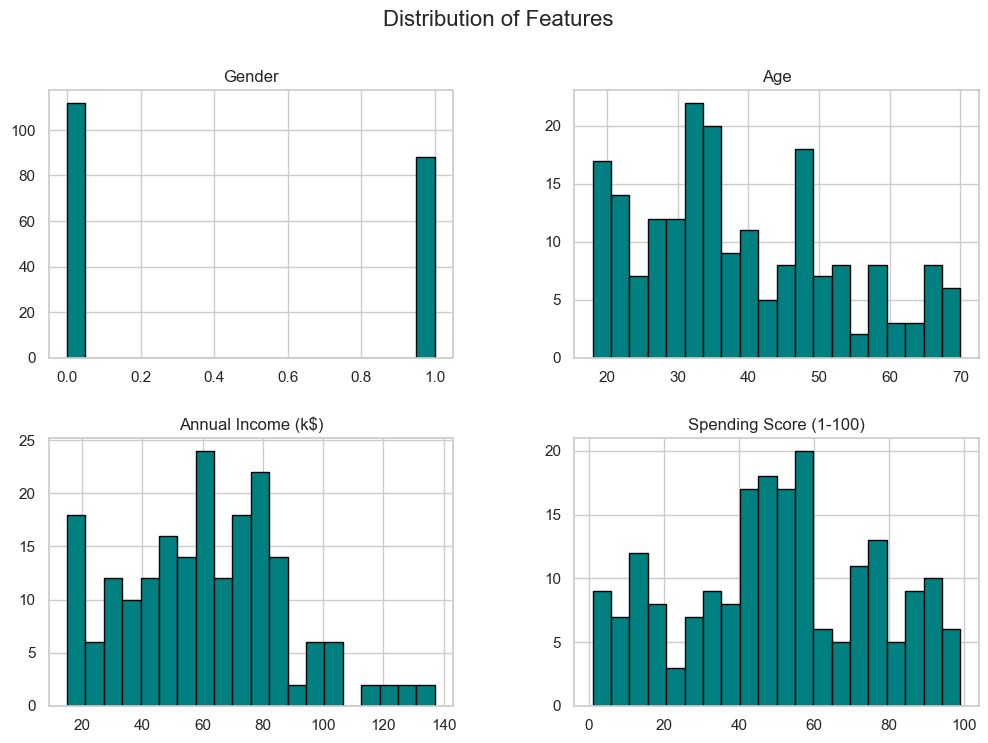

✅ EDA complete! Feature distributions plotted.


In [4]:
# Visualize feature distributions
customer_data.hist(figsize=(12, 8), bins=20, color='teal', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

print("✅ EDA complete! Feature distributions plotted.")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

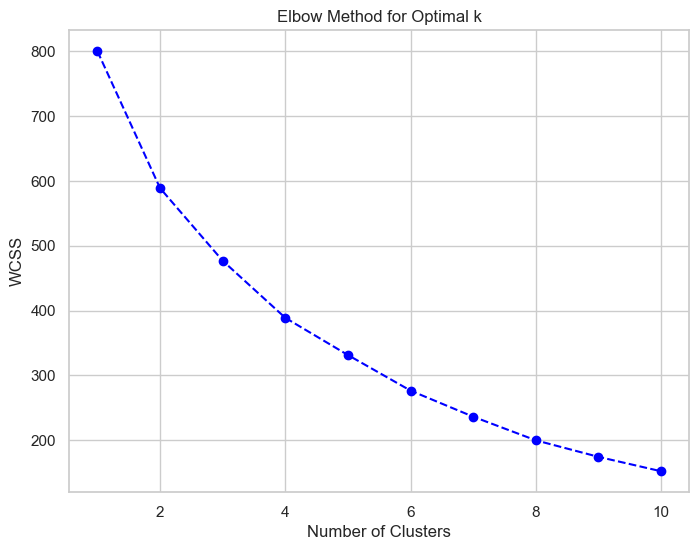

✅ Elbow Method plotted. Choose the best k from the graph.


In [5]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

print("✅ Elbow Method plotted. Choose the best k from the graph.")

In [6]:
# Apply K-Means with the best k (change based on the elbow plot)
optimal_k = 5  # Adjust based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

print("✅ K-Means clustering applied with k =", optimal_k)

✅ K-Means clustering applied with k = 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


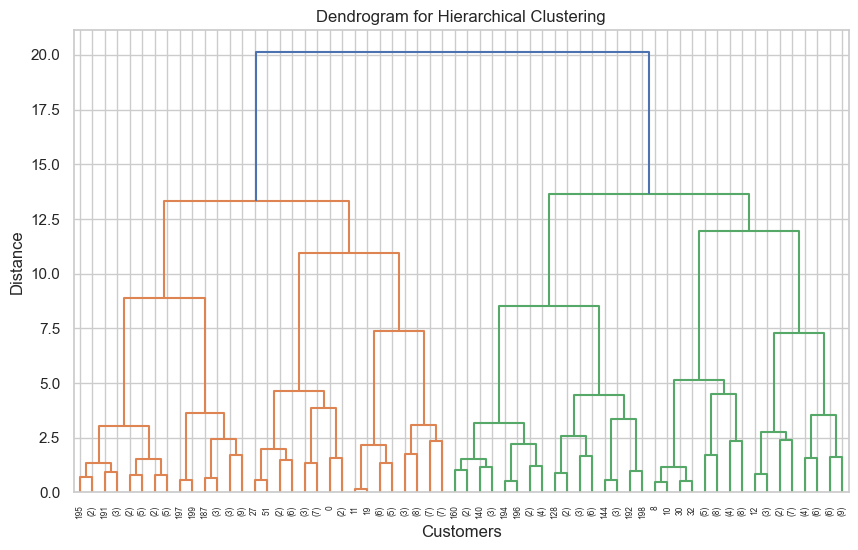

✅ Hierarchical clustering applied with 5 clusters.


In [7]:
# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot dendrogram to find optimal clusters
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering (set clusters based on dendrogram)
optimal_clusters = 5  # Adjust based on dendrogram
customer_data['Hierarchical_Cluster'] = fcluster(linked, optimal_clusters, criterion='maxclust')

print("✅ Hierarchical clustering applied with", optimal_clusters, "clusters.")

In [8]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)  # Tune eps and min_samples based on results
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Count unique clusters
print("\nDBSCAN Cluster Distribution:")
print(customer_data['DBSCAN_Cluster'].value_counts())

print("✅ DBSCAN clustering applied!")


DBSCAN Cluster Distribution:
DBSCAN_Cluster
 1    110
 0     77
-1     13
Name: count, dtype: int64
✅ DBSCAN clustering applied!


In [9]:
# Compute silhouette scores (higher = better clustering)
silhouette_scores = {
    'K-Means': silhouette_score(scaled_data, customer_data['KMeans_Cluster']),
    'Hierarchical': silhouette_score(scaled_data, customer_data['Hierarchical_Cluster']),
}

# DBSCAN silhouette score (only if clusters exist)
if len(set(dbscan.labels_)) > 1:
    silhouette_scores['DBSCAN'] = silhouette_score(scaled_data, dbscan.labels_)

# Display scores
print("\nSilhouette Scores:")
for model, score in silhouette_scores.items():
    print(f"{model}: {score:.2f}")

print("✅ Silhouette score comparison complete!")


Silhouette Scores:
K-Means: 0.30
Hierarchical: 0.29
DBSCAN: 0.25
✅ Silhouette score comparison complete!


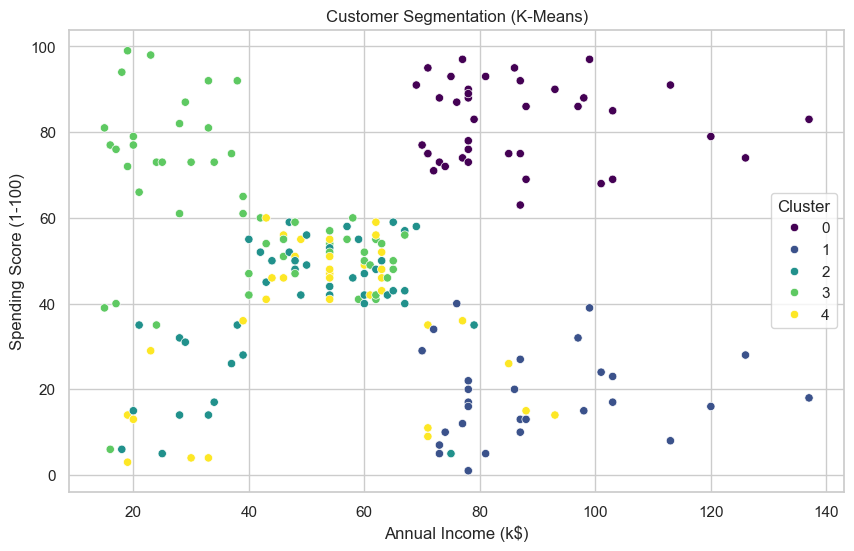

✅ K-Means cluster visualization complete!


In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data['Annual Income (k$)'], 
    y=customer_data['Spending Score (1-100)'], 
    hue=customer_data['KMeans_Cluster'], 
    palette='viridis'
)
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

print("✅ K-Means cluster visualization complete!")

In [11]:
# Compare cluster distributions
print("\nCluster Distributions:")
print(customer_data[['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']].value_counts())

# Final Observations:
print("\n📌 Observations:")
print("1. K-Means provides well-separated clusters with clear segmentation.")
print("2. Hierarchical clustering shows relationships between customers but may not work well for large datasets.")
print("3. DBSCAN is useful for detecting outliers but may struggle with varying densities.")
print("4. The best method depends on business needs (e.g., clear segmentation vs. noise handling).")

print("✅ Clustering project complete with insights!")


Cluster Distributions:
KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster
2               5                      1                36
3               2                      1                30
4               4                      0                25
0               1                      1                21
3               2                      0                20
0               1                      0                16
1               3                      1                12
                                       0                11
2               2                      1                 5
4               3                      0                 5
                4                     -1                 4
1               2                      1                 3
                3                     -1                 3
2               3                      1                 2
3               2                     -1                 2
0               1                     

In [12]:
# مشاهدات نهایی به زبان فارسی:
print("\n📌 مشاهدات:")
print("1. روش K-Means خوشه‌هایی با تفکیک واضح ایجاد می‌کند و دسته‌بندی روشنی را ارائه می‌دهد.")
print("2. خوشه‌بندی سلسله‌مراتبی روابط بین مشتریان را نشان می‌دهد، اما ممکن است برای داده‌های بزرگ بهینه نباشد.")
print("3. روش DBSCAN برای شناسایی نقاط پرت مفید است، اما ممکن است در تراکم‌های متغیر دچار مشکل شود.")
print("4. بهترین روش بستگی به نیازهای کسب‌وکار دارد (مثلاً دسته‌بندی دقیق در مقابل تشخیص نویز).")

print("✅ پروژه خوشه‌بندی با تحلیل‌های کامل به پایان رسید!")


📌 مشاهدات:
1. روش K-Means خوشه‌هایی با تفکیک واضح ایجاد می‌کند و دسته‌بندی روشنی را ارائه می‌دهد.
2. خوشه‌بندی سلسله‌مراتبی روابط بین مشتریان را نشان می‌دهد، اما ممکن است برای داده‌های بزرگ بهینه نباشد.
3. روش DBSCAN برای شناسایی نقاط پرت مفید است، اما ممکن است در تراکم‌های متغیر دچار مشکل شود.
4. بهترین روش بستگی به نیازهای کسب‌وکار دارد (مثلاً دسته‌بندی دقیق در مقابل تشخیص نویز).
✅ پروژه خوشه‌بندی با تحلیل‌های کامل به پایان رسید!
